<Figure size 432x288 with 0 Axes>

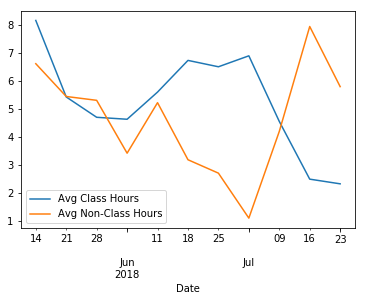

In [6]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("group_timesheet.csv") 
     
# Convert 'Date' from String to Datetime
df['Date'] = pd.to_datetime(df['Date'])

# Index on Date field, enabling time-based analysis
df.set_index(df['Date'], inplace=True, drop=True)

# This next set of commands could be written with fewer lines but 
# for readability in this case, more is better.
class_df = df[df['Time Type'] == 'C']  # subset df with only Class rows
parti_df = df[df['Time Type'] != 'C']  # subset df with of only non-Class rows

# Sum Class and Participation Hours, grouping by week (starting Mondays)
class_summary_df = pd.DataFrame(class_df['Hours'].resample('W-MON').sum()).rename(columns={'Hours':'C Hours'})
parti_summary_df = pd.DataFrame(parti_df['Hours'].resample('W-MON').sum()).rename(columns={'Hours':'P Hours'})

# How many timesheets had records for each particular week? Use this to calculate mean.
count_df = df[['Timesheet ID' ]].resample('W-MON').nunique().rename(columns={'Timesheet ID':'Sheet Count'})

# Merge the three subset dataframes: class, non-class and timesheet count 
summary_df = class_summary_df.merge(\
                                    parti_summary_df, left_index=True, right_index=True, how='outer').merge(\
                                    count_df, left_index=True, right_index=True, how='outer')

# Calculate the mean for Class and Non-Class hours each week
summary_df['Avg Class Hours'] = summary_df['C Hours'] / summary_df['Sheet Count']
summary_df['Avg Non-Class Hours'] = summary_df['P Hours'] / summary_df['Sheet Count']

# drop first and last row because they are outliers, with only partial weeks and few recordings
summary_df = summary_df[1:-1]

plt.figure();
summary_df[['Avg Class Hours','Avg Non-Class Hours']].plot();